## Tarea7
## Cristina Moreno
--------------------------------------------------------------------- 

1) Dados los puntos (0,1), (1,5), (2,3), determine el spline cúbico. 

In [2]:
def spline_cubico_natural(x, a):
 
    n = len(x) - 1

 
    h = [0]*(n)
    for i in range(n):
        h[i] = x[i+1] - x[i]


    alpha = [0]*(n)
    for i in range(1, n):
        alpha[i] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])


    l = [0]*(n+1)
    mu = [0]*(n+1)
    z = [0]*(n+1)

    l[0] = 1
    mu[0] = 0
    z[0] = 0

    for i in range(1, n):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]

    
    l[n] = 1
    z[n] = 0
    c = [0]*(n+1)
    c[n] = 0

    
    b = [0]*n
    d = [0]*n

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j]) / (3*h[j])


    return a, b, c, d

x = [0, 1, 2]
y = [1, 5, 3]

a, b, c, d = spline_cubico_natural(x, y)

for j in range(len(x)-1):
    print(f"Intervalo [{x[j]}, {x[j+1]}]:")
    print(f" Sj(x) = {a[j]} + {b[j]}(x-{x[j]}) + {c[j]}(x-{x[j]})^2 + {d[j]}(x-{x[j]})^3")
 

Intervalo [0, 1]:
 Sj(x) = 1 + 5.5(x-0) + 0.0(x-0)^2 + -1.5(x-0)^3
Intervalo [1, 2]:
 Sj(x) = 5 + 1.0(x-1) + -4.5(x-1)^2 + 1.5(x-1)^3


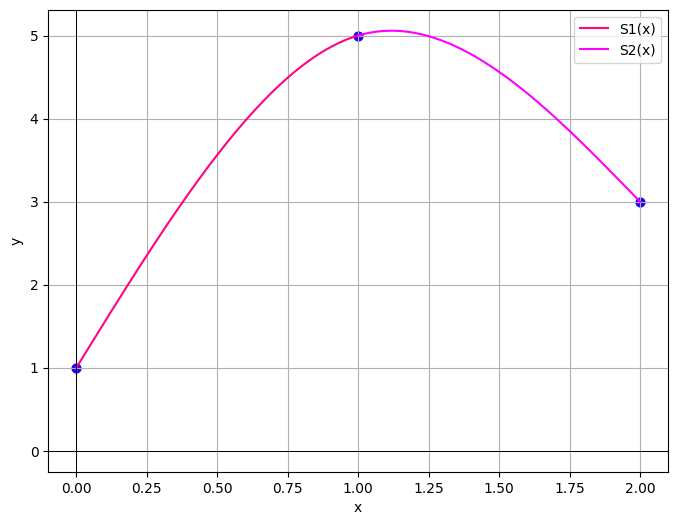

In [18]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0, 1, 200)
x2 = np.linspace(1, 2, 200)


def sp1(x):
    return 1 + 5.5*(x-0) + 0.0*(x-0)**2 - 1.5*(x-0)**3


def sp2(x):
    return 5 + 1.0*(x-1) - 4.5*(x-1)**2 + 1.5*(x-1)**3

plt.figure(figsize=(8, 6))

plt.plot(x1, sp1(x1), label='S1(x)', color="#FF0482")
plt.plot(x2, sp2(x2), label='S2(x)', color='#FF00FF')

x = [0, 1, 2]
y = [1, 5, 3]
for xi, yi in zip(x, y):
    plt.scatter(xi, yi, color='#2600FF', s=40)

plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Dados los puntos (−1,1), (1,3), determine el spline cúbico sabiendo que 𝑓
′
(𝑥0
) =
1, 𝑓
′
(𝑥𝑛
) = 2

In [7]:
def spline_cubico_clamped(x, a, FPO, FPN):
    

    n = len(x) - 1
    

    h = [0]*n
    for i in range(n):
        h[i] = x[i+1] - x[i]

    alpha = [0]*(n+1)
    alpha[0] = 3*( (a[1]-a[0])/h[0] - FPO )
    alpha[n] = 3*( FPN - (a[n]-a[n-1])/h[n-1] )


    for i in range(1, n):
        alpha[i] = 3/h[i] * (a[i+1]-a[i]) - 3/h[i-1] * (a[i]-a[i-1])


    l = [0]*(n+1)
    mu = [0]*(n+1)
    z = [0]*(n+1)

    l[0] = 2*h[0]
    mu[0] = 0.5
    z[0] = alpha[0] / l[0]


    for i in range(1, n):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]


    l[n] = h[n-1]*(2 - mu[n-1])
    z[n] = (alpha[n] - h[n-1]*z[n-1]) / l[n]

    c = [0]*(n+1)
    c[n] = z[n]

    b = [0]*n
    d = [0]*n

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1] + 2*c[j]) / 3
        d[j] = (c[j+1]-c[j]) / (3*h[j])

    return a[:-1], b, c[:-1], d


x = [-1, 1]
y = [1, 3]

FPO=1
FPN=2

a, b, c, d = spline_cubico_clamped(x, y, FPO, FPN)

for j in range(len(x)-1):
    print(f"Intervalo [{x[j]}, {x[j+1]}]:")
    print(f" Sj(x) = {a[j]} + {b[j]}(x-({x[j]})) + {c[j]}(x-({x[j]}))^2 + {d[j]}(x-({x[j]}))^3")
 

Intervalo [-1, 1]:
 Sj(x) = 1 + 1.0(x-(-1)) + -0.5(x-(-1))^2 + 0.25(x-(-1))^3


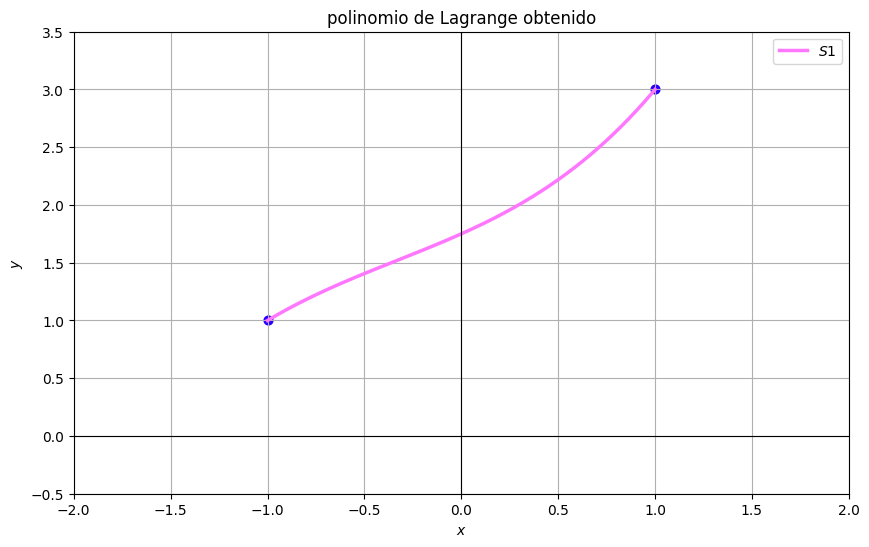

In [17]:
import numpy as np

x = np.linspace(-1, 1, 400)
def spline(x):
    return 1 + 1.0*(x-(-1)) + -0.5*(x-(-1))**2 + 0.25*(x-(-1))**3

plt.figure(figsize=(10, 6))


plt.plot(x, spline(x), label=r'$S1$', color='#FF77FF',linewidth=2.5)
x = [-1, 1]
y = [1, 3]
for xi, yi in zip(x, y):
    plt.scatter(xi, yi, color='#2600FF', s=40)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'polinomio de Lagrange obtenido')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True)
plt.legend()
plt.ylim(-0.5, 3.5)
plt.xlim(-2, 2)
plt.show()




El codigo esta siendo usando para la resolucion de ejercicios las partes desarolladas fueron 

* Alpha
* el método Thomas (resolución de sistema tridiagonal)
  

Usando la función anterior, encuentre el spline cúbico para:
xs = [1, 2, 3]
ys = [2, 3, 5]

In [28]:

def spline_cubico_natural(x, a):
 
    n = len(x) - 1

 
    h = [0]*(n)
    for i in range(n):
        h[i] = x[i+1] - x[i]


    alpha = [0]*(n)
    for i in range(1, n):
        alpha[i] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])


    l = [0]*(n+1)
    mu = [0]*(n+1)
    z = [0]*(n+1)

    l[0] = 1
    mu[0] = 0
    z[0] = 0

    for i in range(1, n):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]

    
    l[n] = 1
    z[n] = 0
    c = [0]*(n+1)
    c[n] = 0

    
    b = [0]*n
    d = [0]*n

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j]) / (3*h[j])


    return a, b, c, d

x = [1, 2,3]
y = [2,3,5]

a, b, c, d = spline_cubico_natural(x, y)

for j in range(len(x)-1):
    print(f"Intervalo [{x[j]}, {x[j+1]}]:")
    print(f" Sj(x) = {a[j]} + {b[j]}(x-{x[j]}) + {c[j]}(x-{x[j]})^2 + {d[j]}(x-{x[j]})^3")
 

 

Intervalo [1, 2]:
 Sj(x) = 2 + 0.75(x-1) + 0.0(x-1)^2 + 0.25(x-1)^3
Intervalo [2, 3]:
 Sj(x) = 3 + 1.5(x-2) + 0.75(x-2)^2 + -0.25(x-2)^3


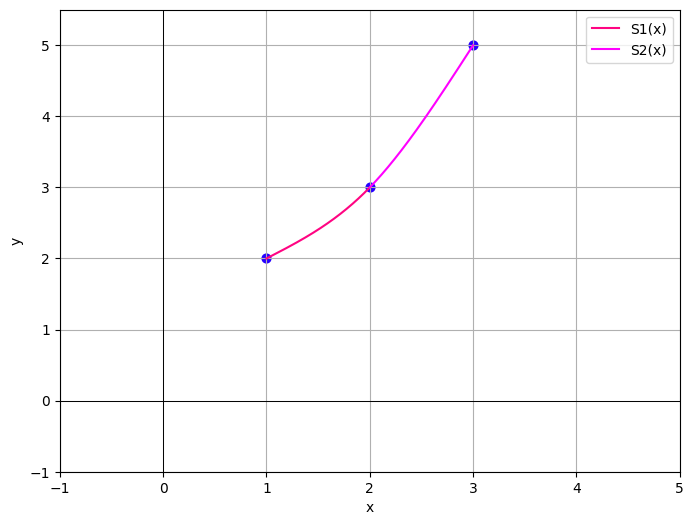

In [16]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(1, 2, 200)
x2 = np.linspace(2, 3, 200)


def sp1(x):
    return 2 + 0.75*(x-1) + 0.0*(x-1)**2 + 0.25*(x-1)**3


def sp2(x):
    return 3 + 1.5*(x-2) + 0.75*(x-2)**2 + -0.25*(x-2)**3

plt.figure(figsize=(8, 6))

plt.plot(x1, sp1(x1), label='S1(x)', color="#FF0482")
plt.plot(x2, sp2(x2), label='S2(x)', color='#FF00FF')


x = [1, 2,3]
y = [2,3,5]
for xi, yi in zip(x, y):
    plt.scatter(xi, yi, color='#2600FF', s=40)

plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 5.5)
plt.xlim(-1, 5)
plt.legend()
plt.grid(True)
plt.show()


Usando la función anterior, encuentre el spline cúbico para:
xs = [0, 1, 2, 3]
ys = [-1 ,1, 5, 2]

In [1]:

def spline_cubico_natural(x, a):
 
    n = len(x) - 1

 
    h = [0]*(n)
    for i in range(n):
        h[i] = x[i+1] - x[i]


    alpha = [0]*(n)
    for i in range(1, n):
        alpha[i] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])


    l = [0]*(n+1)
    mu = [0]*(n+1)
    z = [0]*(n+1)

    l[0] = 1
    mu[0] = 0
    z[0] = 0

    for i in range(1, n):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]

    
    l[n] = 1
    z[n] = 0
    c = [0]*(n+1)
    c[n] = 0

    
    b = [0]*n
    d = [0]*n

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j]) / (3*h[j])


    return a, b, c, d

x = [0,1, 2,3]
y = [-1,1,5,2]

a, b, c, d = spline_cubico_natural(x, y)

for j in range(len(x)-1):
    print(f"Intervalo [{x[j]}, {x[j+1]}]:")
    print(f" Sj(x) = {a[j]} + {b[j]}(x-{x[j]}) + {c[j]}(x-{x[j]})^2 + {d[j]}(x-{x[j]})^3")
 

 

Intervalo [0, 1]:
 Sj(x) = -1 + 1.0(x-0) + 0.0(x-0)^2 + 1.0(x-0)^3
Intervalo [1, 2]:
 Sj(x) = 1 + 4.0(x-1) + 3.0(x-1)^2 + -3.0(x-1)^3
Intervalo [2, 3]:
 Sj(x) = 5 + 1.0(x-2) + -6.0(x-2)^2 + 2.0(x-2)^3


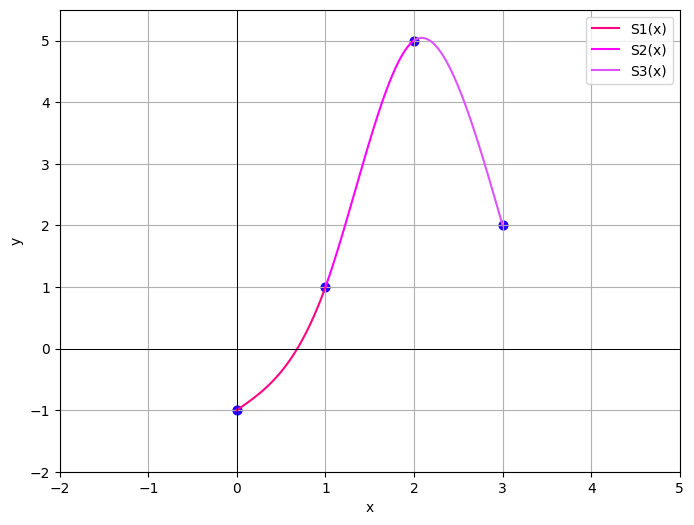

In [15]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0, 1, 200)
x2 = np.linspace(1, 2, 200)
x3 = np.linspace(2, 3, 200)


def sp1(x):
    return -1 + 1.0*(x-0) + 0.0*(x-0)**2 + 1.0*(x-0)**3


def sp2(x):
    return 1 + 4.0*(x-1) + 3.0*(x-1)**2 + -3.0*(x-1)**3

def sp3(x):
    return 5 + 1.0*(x-2) + -6.0*(x-2)**2 + 2.0*(x-2)**3

plt.figure(figsize=(8, 6))

plt.plot(x1, sp1(x1), label='S1(x)', color="#FF0482")
plt.plot(x2, sp2(x2), label='S2(x)', color='#FF00FF')
plt.plot(x3, sp3(x3), label='S3(x)', color="#DE53FD")   

x = [0,1, 2,3]
y = [-1,1,5,2]
for xi, yi in zip(x, y):
    plt.scatter(xi, yi, color="#2600FF", s=40)

plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2, 5.5)
plt.xlim(-2, 5)
plt.legend()
plt.grid(True)
plt.show()


Use la función cubic_spline_clamped, provista en el enlace de Github, para graficar
los datos de la siguiente tabla

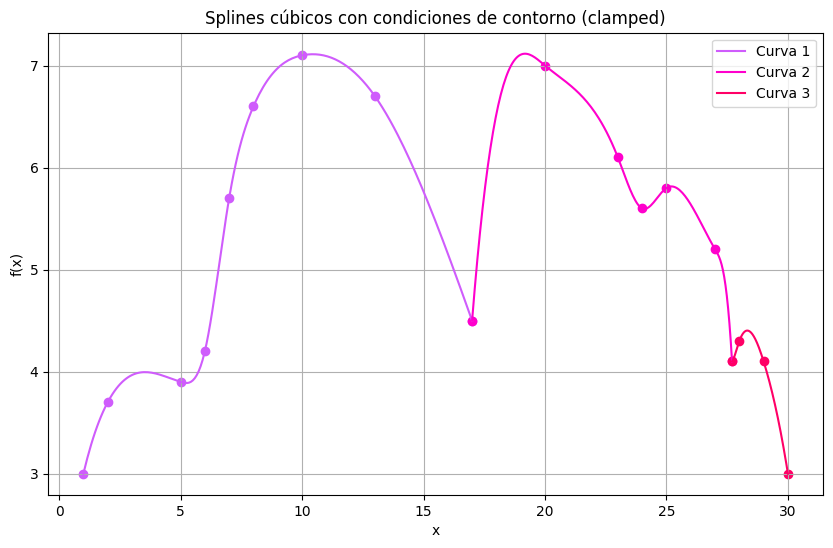

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def spline_cubico_clamped(x, a, FPO, FPN):

    n = len(x) - 1
    h = [x[i+1] - x[i] for i in range(n)]

    alpha = [0]*(n+1)
    alpha[0] = 3*((a[1]-a[0])/h[0] - FPO)
    alpha[n] = 3*(FPN - (a[n]-a[n-1])/h[n-1])

    for i in range(1, n):
        alpha[i] = 3/h[i]*(a[i+1]-a[i]) - 3/h[i-1]*(a[i]-a[i-1])

    l = [0]*(n+1)
    mu = [0]*(n+1)
    z = [0]*(n+1)

    l[0] = 2*h[0]
    mu[0] = 0.5
    z[0] = alpha[0] / l[0]

    for i in range(1, n):
        l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]

    l[n] = h[n-1]*(2 - mu[n-1])
    z[n] = (alpha[n] - h[n-1]*z[n-1]) / l[n]

    c = [0]*(n+1)
    c[n] = z[n]
    b = [0]*n
    d = [0]*n

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1] + 2*c[j]) / 3
        d[j] = (c[j+1]-c[j]) / (3*h[j])

    return a[:-1], b, c[:-1], d


x1 = [1,2,5,6,7,8,10,13,17]
y1 = [3.0,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5]
fp1 = [1.0, -0.67] 


x2 = [17,20,23,24,25,27,27.7]
y2 = [4.5,7.0,6.1,5.6,5.8,5.2,4.1]
fp2 = [3.0, -4.0]


x3 = [27.7,28,29,30]
y3 = [4.1,4.3,4.1,3.0]
fp3 = [0.33, -1.5]



def eval_spline(x, a, b, c, d, X):
    Y = []
    for xq in X:
        for j in range(len(a)):
            if x[j] <= xq <= x[j+1]:
                dx = xq - x[j]
                yq = a[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3
                Y.append(yq)
                break
    return np.array(Y)



plt.figure(figsize=(10,6))

for x, y, fp, color, label in [
    (x1, y1, fp1, "#CF5CFC", "Curva 1"),
    (x2, y2, fp2, "#FF00CC", "Curva 2"),
    (x3, y3, fp3, "#FF0066", "Curva 3")
]:
    a,b,c,d = spline_cubico_clamped(x, y, fp[0], fp[1])

    Xq = np.linspace(min(x), max(x), 200)
    Yq = eval_spline(x, a, b, c, d, Xq)

    plt.plot(Xq, Yq, color=color, label=label)
    plt.scatter(x, y, color=color)


plt.title("Splines cúbicos con condiciones de contorno (clamped)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()
